In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

### Read data

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
y = data['Outcome']

In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
X = data.drop("Outcome", axis=1)   # all columns except 'Outcome'

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# help(train_test_split)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39, stratify = y)

In [13]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0,105,90,0,0,29.6,0.197,46
217,6,125,68,30,120,30.0,0.464,32
15,7,100,0,0,0,30.0,0.484,32
252,2,90,80,14,55,24.4,0.249,24
332,1,180,0,0,0,43.3,0.282,41
...,...,...,...,...,...,...,...,...
260,3,191,68,15,130,30.9,0.299,34
305,2,120,76,37,105,39.7,0.215,29
422,0,102,64,46,78,40.6,0.496,21
308,0,128,68,19,180,30.5,1.391,25


In [14]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [15]:
dt_model = DecisionTreeClassifier()

In [16]:
model = dt_model.fit(X_train, y_train)

In [17]:
y_predicted = model.predict(X_test)

In [18]:
y_predicted #predicted value

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [19]:
y_test #acutal value to be compared with prediction

73     0
107    0
128    1
156    0
184    0
      ..
403    0
3      0
659    1
632    0
436    0
Name: Outcome, Length: 154, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
accuracy = accuracy_score(y_predicted, y_test)

In [22]:
accuracy

0.7337662337662337

In [23]:
report = classification_report(y_predicted, y_test)

In [24]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       103
           1       0.59      0.63      0.61        51

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.74      0.73      0.74       154



In [25]:
confusion_mat = confusion_matrix(y_predicted, y_test)

In [26]:
confusion_mat

array([[81, 22],
       [19, 32]], dtype=int64)

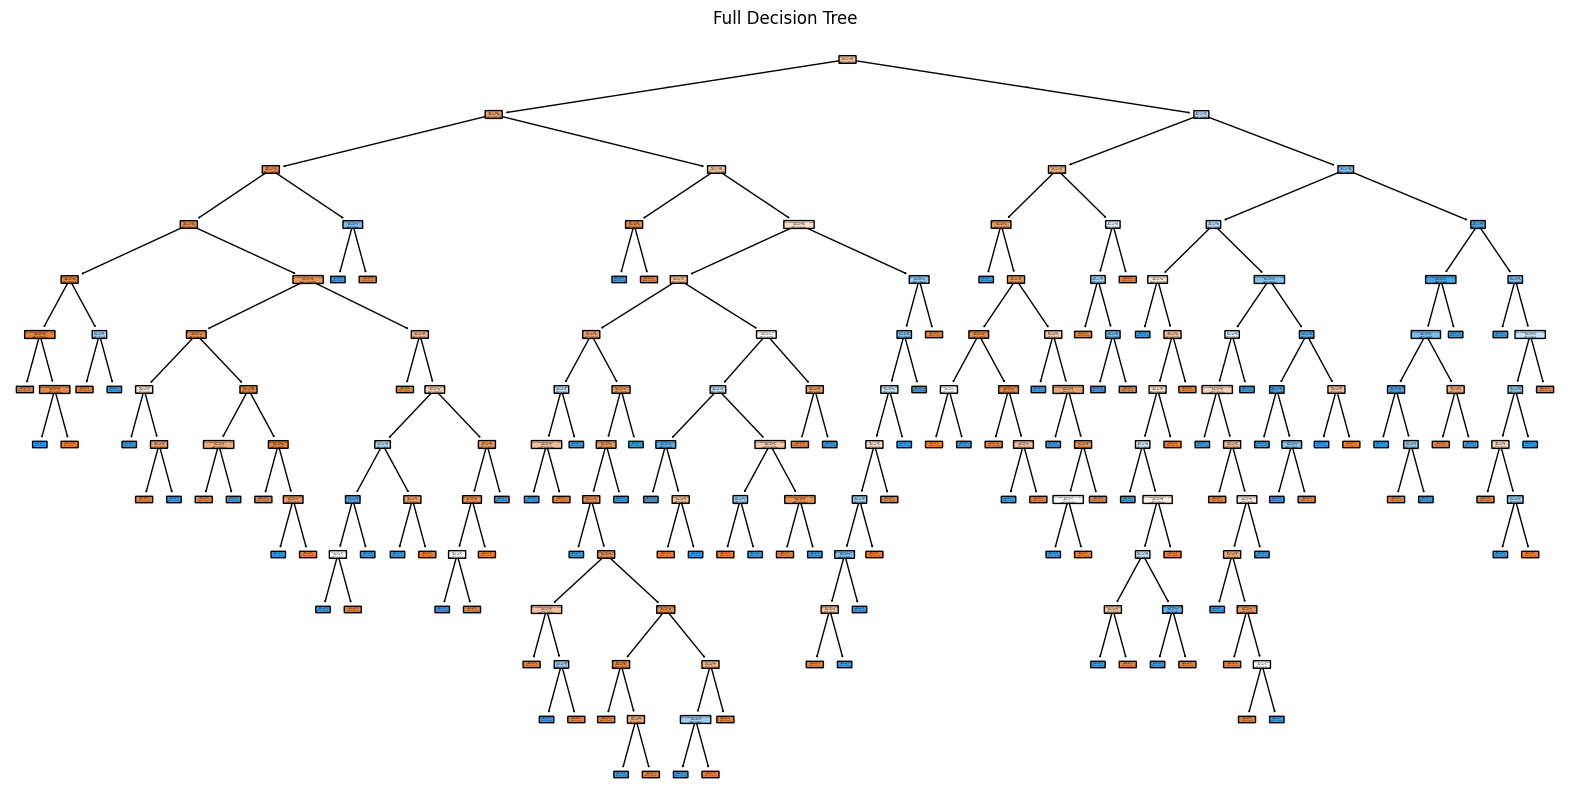

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))  # Optional: resize as needed
tree.plot_tree(model, filled=True, rounded=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Full Decision Tree")
plt.savefig("decision_tree.png") 
plt.show()

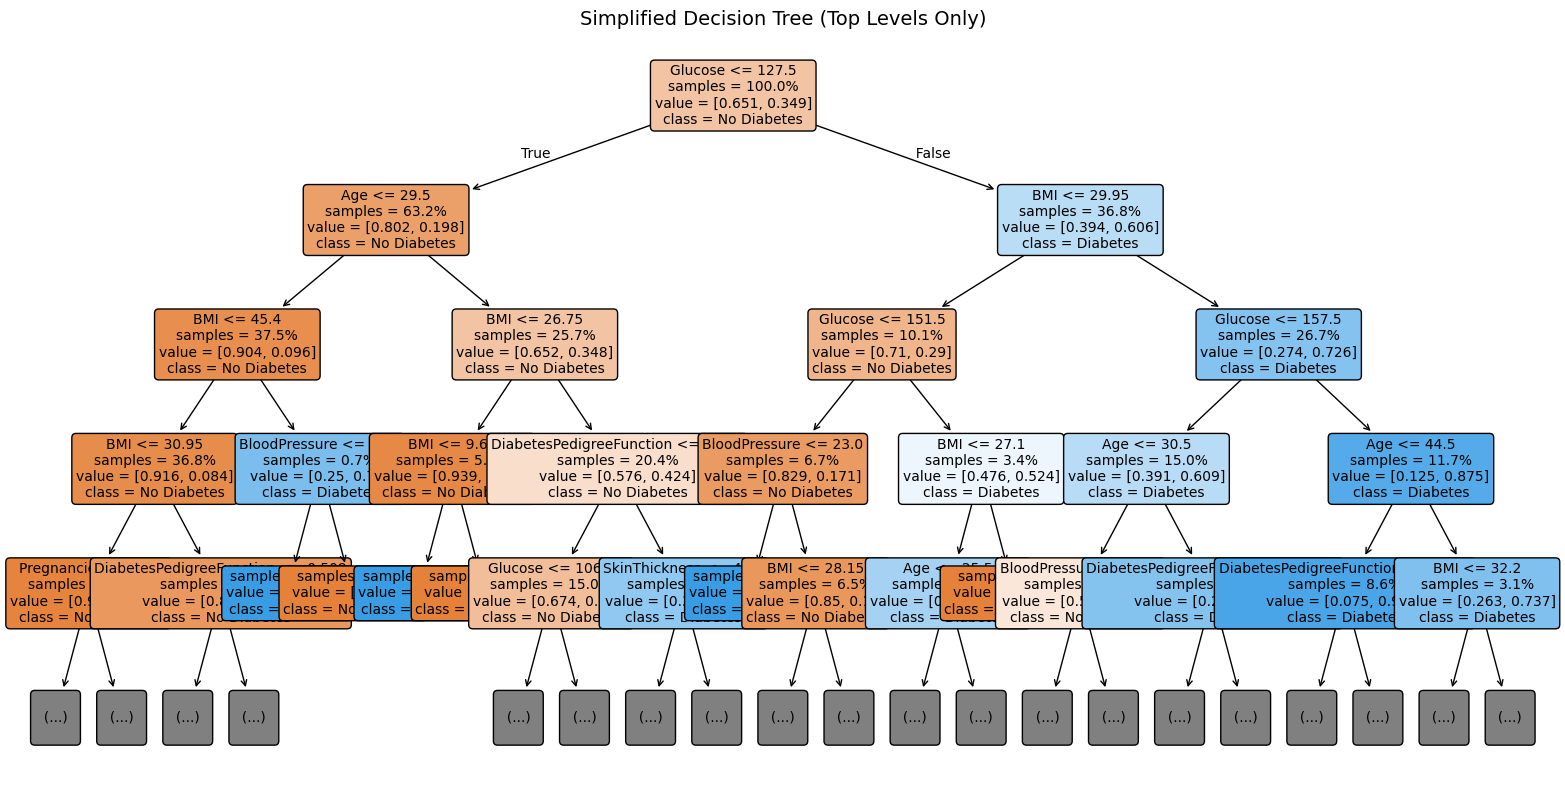

In [33]:
# Limit tree depth for better readability
max_plot_depth = 4

plt.figure(figsize=(16, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=max_plot_depth,  # show only top levels
    proportion=True,  # normalize node sizes
    impurity=False     # cleaner without Gini/Entropy
)
plt.title("Simplified Decision Tree (Top Levels Only)", fontsize=14)
plt.tight_layout()
plt.show()